In [2]:
import pandas as pd
import numpy as np

In [3]:
orders_df      = pd.read_csv("data/olist_orders_dataset.csv")
reviews_df     = pd.read_csv("data/olist_order_reviews_dataset.csv")
order_items_df = pd.read_csv("data/olist_order_items_dataset.csv")
products_df    = pd.read_csv("data/olist_products_dataset.csv")

In [4]:
reviews_df.review_score.value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [5]:
reviews_df = reviews_df.iloc[:, :3]
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   review_id     100000 non-null  object
 1   order_id      100000 non-null  object
 2   review_score  100000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [6]:
reviews_df["is_positive"] = (reviews_df["review_score"] > 3).astype(int)
reviews_df

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99995  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99996  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99997  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99998  be360f18f5df1e0541061c87021e6d93  f8bd3f2000c28c5342fedeb5e50f2e75   
99999  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score  is_positive  
0                 4            1  
1                 5            1  
2                 5            1  
3                 5            1  
4                 5            1  
...             ...          ...  
99995             5            1  
99996             5            1  
99997             4            1  
99998             1            0  
99999             1            0  

[100000 rows x 4 columns]

In [7]:
reviews_df.value_counts("is_positive")

is_positive
1    76620
0    23380
dtype: int64

In [8]:
reviews_df = reviews_df[reviews_df.review_score != 3]
reviews_df.value_counts("is_positive")

is_positive
1    76620
0    15093
dtype: int64

In [9]:
reviews_df.drop("review_score", axis = 1, inplace = True)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91713 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    91713 non-null  object
 1   order_id     91713 non-null  object
 2   is_positive  91713 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [11]:
reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   is_positive  
0            1  
1            1  
2            1  
3            1  
4            1

In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
#df = reviews_df.join(other = orders_df, on = "order_id")
df = reviews_df.merge(right = orders_df, on = "order_id")
df

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
91708  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
91709  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
91710  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
91711  be360f18f5df1e0541061c87021e6d93  f8bd3f2000c28c5342fedeb5e50f2e75   
91712  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       is_positive                       customer_id order_status  \
0                1  41dcb106f807e993532d446263290104    delivered   
1                1  8a2e7ef9053dea531e4dc76bd6d853e6    delivered   
2                1  e226dfed6544df5b7b87a48208690feb    delivered   
3                1  de6dff97e5f1ba84a3cd9a3bc97df5f6    delivered   
4                1  5986b333ca0d44534a156a52a8e33a83    delivered   
...            ...                               ...          ...   
91708            1  d0d7086dea6fcf42b9b690b9f3745c58    delivered   
91709            1  fcc7b1caafe3b77fd587bab964c4d1fb    delivered   
91710            1  3aa00401736823c73e9fe8683328fa6b    delivered   
91711            0  8df587ce8a11ee97b3de9ef3405245c2    delivered   
91712            0  f6fff47846276bed044b63474bd38884    delivered   

      order_purchase_timestamp    order_approved_at  \
0          2018-01-11 15:30:49  2018-01-11 15:47:59   
1          2018-02-28 12:25:19  2018-02-28 12:48:39   
2          2018-02-03 09:56:22  2018-02-03 10:33:41   
3          2017-04-09 17:41:13  2017-04-09 17:55:19   
4          2018-02-10 10:59:03  2018-02-10 15:48:21   
...                        ...                  ...   
91708      2017-12-03 21:45:23  2017-12-03 22:08:00   
91709      2018-03-18 09:52:19  2018-03-18 10:08:04   
91710      2018-06-22 16:47:28  2018-06-22 18:15:29   
91711      2017-12-10 18:44:23  2017-12-12 03:59:36   
91712      2017-06-29 10:43:25  2017-06-30 02:45:15   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2018-01-12 21:57:22           2018-01-17 18:42:41   
1              2018-03-02 19:08:15           2018-03-09 23:17:20   
2              2018-02-06 16:18:28           2018-02-16 17:28:48   
3              2017-04-10 14:24:47           2017-04-20 09:08:35   
4              2018-02-15 19:36:14           2018-02-28 16:33:35   
...                            ...                           ...   
91708          2017-12-07 19:17:29           2017-12-08 17:19:00   
91709          2018-03-19 23:51:29           2018-03-21 17:44:08   
91710          2018-06-25 12:58:00           2018-06-30 12:57:51   
91711          2017-12-12 18:05:41           2017-12-14 22:04:30   
91712          2017-06-30 13:53:54           2017-07-02 09:44:54   

      order_estimated_delivery_date  
0               2018-02-02 00:00:00  
1               2018-03-14 00:00:00  
2               2018-03-09 00:00:00  
3               2017-05-10 00:00:00  
4               2018-03-09 00:00:00  
...                             ...  
91708           2017-12-20 00:00:00  
91709           2018-04-06 00:00:00  
91710           2018-07-16 00:00:00  
91711           2017-12-29 00:00:00  
91712           2017-07-12 00:00:00  

[91713 rows x 10 columns]

In [14]:
df.value_counts("order_status")

order_status
delivered      88959
shipped          997
canceled         579
unavailable      576
invoiced         302
processing       293
created            5
approved           2
dtype: int64

In [15]:
df = df[df.order_status == "delivered"]
df.value_counts("order_status")

order_status
delivered    88959
dtype: int64

In [16]:
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [17]:
order_items_df.drop("shipping_limit_date", axis = 1, inplace = True)
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
 5   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [18]:
order_items_df.value_counts("order_item_id")

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
dtype: int64

In [19]:
order_items_df = order_items_df[order_items_df.order_item_id == 1]
order_items_df.value_counts("order_item_id")

order_item_id
1    98666
dtype: int64

In [20]:
df = df.merge(right = order_items_df, on = "order_id")
df

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
88954  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
88955  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
88956  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
88957  be360f18f5df1e0541061c87021e6d93  f8bd3f2000c28c5342fedeb5e50f2e75   
88958  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       is_positive                       customer_id order_status  \
0                1  41dcb106f807e993532d446263290104    delivered   
1                1  8a2e7ef9053dea531e4dc76bd6d853e6    delivered   
2                1  e226dfed6544df5b7b87a48208690feb    delivered   
3                1  de6dff97e5f1ba84a3cd9a3bc97df5f6    delivered   
4                1  5986b333ca0d44534a156a52a8e33a83    delivered   
...            ...                               ...          ...   
88954            1  d0d7086dea6fcf42b9b690b9f3745c58    delivered   
88955            1  fcc7b1caafe3b77fd587bab964c4d1fb    delivered   
88956            1  3aa00401736823c73e9fe8683328fa6b    delivered   
88957            0  8df587ce8a11ee97b3de9ef3405245c2    delivered   
88958            0  f6fff47846276bed044b63474bd38884    delivered   

      order_purchase_timestamp    order_approved_at  \
0          2018-01-11 15:30:49  2018-01-11 15:47:59   
1          2018-02-28 12:25:19  2018-02-28 12:48:39   
2          2018-02-03 09:56:22  2018-02-03 10:33:41   
3          2017-04-09 17:41:13  2017-04-09 17:55:19   
4          2018-02-10 10:59:03  2018-02-10 15:48:21   
...                        ...                  ...   
88954      2017-12-03 21:45:23  2017-12-03 22:08:00   
88955      2018-03-18 09:52:19  2018-03-18 10:08:04   
88956      2018-06-22 16:47:28  2018-06-22 18:15:29   
88957      2017-12-10 18:44:23  2017-12-12 03:59:36   
88958      2017-06-29 10:43:25  2017-06-30 02:45:15   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2018-01-12 21:57:22           2018-01-17 18:42:41   
1              2018-03-02 19:08:15           2018-03-09 23:17:20   
2              2018-02-06 16:18:28           2018-02-16 17:28:48   
3              2017-04-10 14:24:47           2017-04-20 09:08:35   
4              2018-02-15 19:36:14           2018-02-28 16:33:35   
...                            ...                           ...   
88954          2017-12-07 19:17:29           2017-12-08 17:19:00   
88955          2018-03-19 23:51:29           2018-03-21 17:44:08   
88956          2018-06-25 12:58:00           2018-06-30 12:57:51   
88957          2017-12-12 18:05:41           2017-12-14 22:04:30   
88958          2017-06-30 13:53:54           2017-07-02 09:44:54   

      order_estimated_delivery_date  order_item_id  \
0               2018-02-02 00:00:00              1   
1               2018-03-14 00:00:00              1   
2               2018-03-09 00:00:00              1   
3               2017-05-10 00:00:00              1   
4               2018-03-09 00:00:00              1   
...                             ...            ...   
88954           2017-12-20 00:00:00              1   
88955           2018-04-06 00:00:00              1   
88956           2018-07-16 00:00:00              1   
88957           2017-12-29 00:00:00              1   
88958           2017-07-12 00:00:00              1   

                             product_id                         seller_id  \
0      fd25ab760bfbba13c198fa3b4f1a0cd3  6d803cb79cc31c41c4c789a75933b3c

In [21]:
products_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [22]:
products_df.drop("product_category_name", axis = 1, inplace = True)

In [23]:
products_df.rename(columns = {"product_description_lenght" : "product_description_length"}, inplace = True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_name_lenght         32341 non-null  float64
 2   product_description_length  32341 non-null  float64
 3   product_photos_qty          32341 non-null  float64
 4   product_weight_g            32949 non-null  float64
 5   product_length_cm           32949 non-null  float64
 6   product_height_cm           32949 non-null  float64
 7   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(1)
memory usage: 2.0+ MB


In [24]:
df = df.merge(right = products_df, on = "product_id")
df

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      e2655da8bccce2ddc2f43cc2c80d24f3  19721d59a9764437477eff0730b48665   
2      cb18f53b563f0bdeb76be0376ddd6b6a  efd626e6a12a82d76e456e34093f8356   
3      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
4      3048ab17e39285ed6f995b5dcd0e74db  1a6b9a764637acbc39e1624a2211f548   
...                                 ...                               ...   
88954  5085bc489aa6b58a29c4f922d59ff826  18ed848509774f56cc8c1c0a1903ad7f   
88955  7e42a39bc8cf4d1eb5897cb48c2889f7  287445be3e2a5f0d3f5036b2a778d1c5   
88956  586e77c5f02b95285a939083359f8241  5f4a120717a4d152577d7d2ec66c45be   
88957  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
88958  be360f18f5df1e0541061c87021e6d93  f8bd3f2000c28c5342fedeb5e50f2e75   

       is_positive                       customer_id order_status  \
0                1  41dcb106f807e993532d446263290104    delivered   
1                1  b1757da2a461d581e1a3b280ca181b7c    delivered   
2                1  da2bd16b131bc90653b87fe4d8fd266e    delivered   
3                1  8a2e7ef9053dea531e4dc76bd6d853e6    delivered   
4                0  e43a8c4a2cacc15e45d6a73beb2ee7e8    delivered   
...            ...                               ...          ...   
88954            0  8f89d962f49f0d7a6d354a4ef3d099c2    delivered   
88955            1  d86567cdc776774d6de508880d117fdd    delivered   
88956            1  bfa946d6497267cfd3bf8cb0217f6a5b    delivered   
88957            1  d8c466a3e7c4cda36cd4ae7d577f44f4    delivered   
88958            0  8df587ce8a11ee97b3de9ef3405245c2    delivered   

      order_purchase_timestamp    order_approved_at  \
0          2018-01-11 15:30:49  2018-01-11 15:47:59   
1          2018-03-26 11:02:31  2018-03-26 11:15:38   
2          2017-12-07 20:33:24  2017-12-07 20:51:05   
3          2018-02-28 12:25:19  2018-02-28 12:48:39   
4          2018-08-07 09:18:41  2018-08-08 03:30:22   
...                        ...                  ...   
88954      2018-02-05 13:13:28  2018-02-05 13:30:39   
88955      2018-05-16 13:29:40  2018-05-16 13:59:36   
88956      2018-07-22 11:50:22  2018-07-23 11:30:58   
88957      2018-06-27 17:31:29  2018-06-28 17:30:45   
88958      2017-12-10 18:44:23  2017-12-12 03:59:36   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2018-01-12 21:57:22           2018-01-17 18:42:41   
1              2018-03-26 22:58:37           2018-04-09 21:53:23   
2              2017-12-08 18:12:34           2017-12-27 18:19:53   
3              2018-03-02 19:08:15           2018-03-09 23:17:20   
4              2018-08-17 16:56:00           2018-08-23 20:48:46   
...                            ...                           ...   
88954          2018-02-06 21:43:26           2018-02-20 01:15:50   
88955          2018-05-17 12:25:00           2018-05-22 17:06:33   
88956          2018-07-25 15:05:00           2018-08-04 13:41:48   
88957          2018-06-29 14:25:00           2018-07-06 13:22:37   
88958          2017-12-12 18:05:41           2017-12-14 22:04:30   

      order_estimated_delivery_date  ...                         seller_id  \
0               2018-02-02 00:00:00  ...  6d803cb79cc31c41c4c789a75933b3c7   
1               2018-04-27 00:00:00  ...  6d803cb79cc31c41c4c789a75933b3c7   
2               2018-01-08 00:00:00  ...  6d803cb79cc31c41c4c789a75933b3c7   
3               2018-03-14 00:00:00  ...  8e6d7754bc7e0f22c96d255ebda59eba   
4               2018-08-21 00:00:00  ...  e9bc59e7b60fc3063eb2290deda4cced   
...                             ...  ...                               ...   
88954           2018-03-07 00:00:00  ...  0b35c634521043bf4b47e21547b99ab5   
88955           2018-06-19 00:00:00  ...  7142540dd4c91e2237acb7e911c4eba2   
88956           2018-08-28 00:00:00  ...  d3e7d37c0df9aef383f3f2a15b0dddfb   
88957           20

In [25]:
import seaborn as sns

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


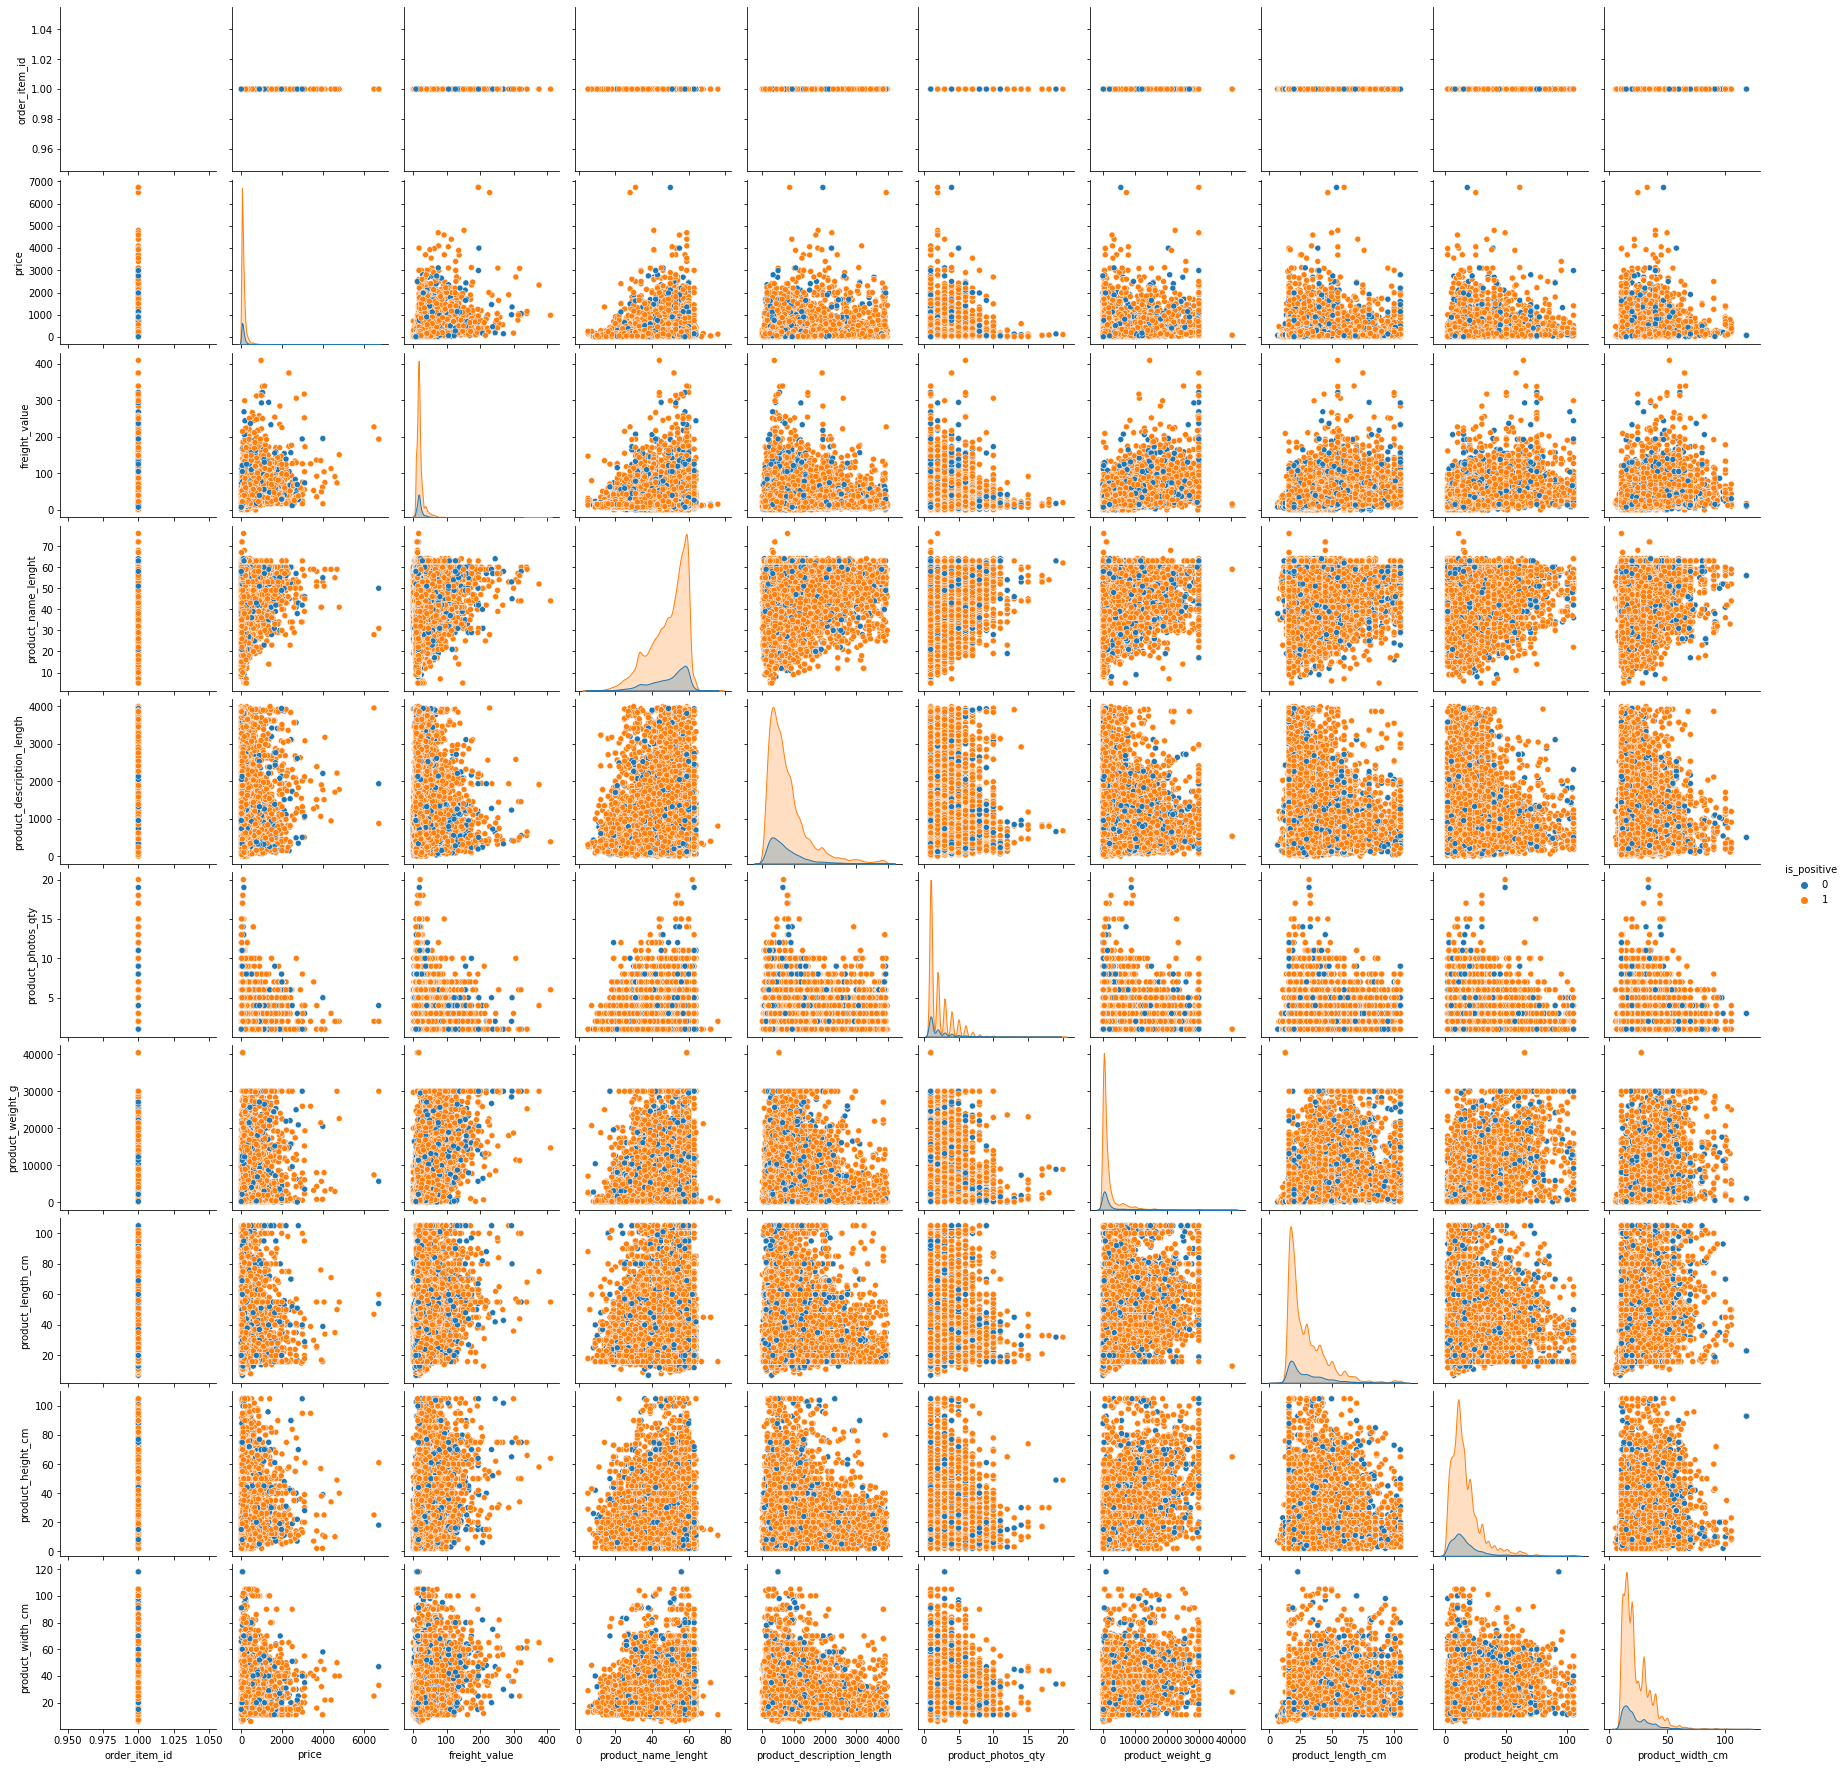

In [26]:
sns.pairplot(df, hue = "is_positive")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88959 entries, 0 to 88958
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   review_id                      88959 non-null  object 
 1   order_id                       88959 non-null  object 
 2   is_positive                    88959 non-null  int64  
 3   customer_id                    88959 non-null  object 
 4   order_status                   88959 non-null  object 
 5   order_purchase_timestamp       88959 non-null  object 
 6   order_approved_at              88946 non-null  object 
 7   order_delivered_carrier_date   88957 non-null  object 
 8   order_delivered_customer_date  88951 non-null  object 
 9   order_estimated_delivery_date  88959 non-null  object 
 10  order_item_id                  88959 non-null  int64  
 11  product_id                     88959 non-null  object 
 12  seller_id                      88959 non-null 

In [28]:
# simplified dataframe for MVP models
df_mvp = df[["is_positive", "price", "freight_value", "product_name_lenght", "product_description_length", "product_photos_qty",
            "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]]
df_mvp

is_positive   price  freight_value  product_name_lenght  \
0                1  185.00          13.63                 42.0   
1                1  185.00          20.26                 42.0   
2                1  185.00          17.05                 42.0   
3                1   79.79           8.30                 47.0   
4                0   65.00          13.80                 47.0   
...            ...     ...            ...                  ...   
88954            0   49.99          15.10                 57.0   
88955            1   59.90          23.00                 59.0   
88956            1  161.00          40.34                 38.0   
88957            1  226.77          61.20                 56.0   
88958            0   10.00           7.78                 58.0   

       product_description_length  product_photos_qty  product_weight_g  \
0                           858.0                 1.0            1300.0   
1                           858.0                 1.0            1300.0   
2                           858.0                 1.0            1300.0   
3                           493.0                 1.0             245.0   
4                           493.0                 1.0             245.0   
...                           ...                 ...               ...   
88954                       338.0                 1.0            2150.0   
88955                       460.0                 6.0            3850.0   
88956                       245.0                 1.0            4000.0   
88957                       623.0                 1.0            7250.0   
88958                       954.0                 1.0             200.0   

       product_length_cm  product_height_cm  product_width_cm  
0                   30.0               30.0              35.0  
1                   30.0               30.0              35.0  
2                   30.0               30.0              35.0  
3                   19.0               14.0              14.0  
4                   19.0               14.0              14.0  
...                  ...                ...               ...  
88954               20.0                8.0              20.0  
88955               47.0               19.0              23.0  
88956               31.0               42.0              43.0  
88957              100.0               25.0              25.0  
88958               20.0               15.0              15.0  

[88959 rows x 10 columns]

In [29]:
# feature engineering for product volume
df_mvp["product_volume_cm3"] = ((df_mvp["product_length_cm"] * df_mvp["product_height_cm"]) * df_mvp["product_width_cm"])
df_mvp

<ipython-input-29-dc943d176cb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mvp["product_volume_cm3"] = ((df_mvp["product_length_cm"] * df_mvp["product_height_cm"]) * df_mvp["product_width_cm"])


is_positive   price  freight_value  product_name_lenght  \
0                1  185.00          13.63                 42.0   
1                1  185.00          20.26                 42.0   
2                1  185.00          17.05                 42.0   
3                1   79.79           8.30                 47.0   
4                0   65.00          13.80                 47.0   
...            ...     ...            ...                  ...   
88954            0   49.99          15.10                 57.0   
88955            1   59.90          23.00                 59.0   
88956            1  161.00          40.34                 38.0   
88957            1  226.77          61.20                 56.0   
88958            0   10.00           7.78                 58.0   

       product_description_length  product_photos_qty  product_weight_g  \
0                           858.0                 1.0            1300.0   
1                           858.0                 1.0            1300.0   
2                           858.0                 1.0            1300.0   
3                           493.0                 1.0             245.0   
4                           493.0                 1.0             245.0   
...                           ...                 ...               ...   
88954                       338.0                 1.0            2150.0   
88955                       460.0                 6.0            3850.0   
88956                       245.0                 1.0            4000.0   
88957                       623.0                 1.0            7250.0   
88958                       954.0                 1.0             200.0   

       product_length_cm  product_height_cm  product_width_cm  \
0                   30.0               30.0              35.0   
1                   30.0               30.0              35.0   
2                   30.0               30.0              35.0   
3                   19.0               14.0              14.0   
4                   19.0               14.0              14.0   
...                  ...                ...               ...   
88954               20.0                8.0              20.0   
88955               47.0               19.0              23.0   
88956               31.0               42.0              43.0   
88957              100.0               25.0              25.0   
88958               20.0               15.0              15.0   

       product_volume_cm3  
0                 31500.0  
1                 31500.0  
2                 31500.0  
3                  3724.0  
4                  3724.0  
...                   ...  
88954              3200.0  
88955             20539.0  
88956             55986.0  
88957             62500.0  
88958              4500.0  

[88959 rows x 11 columns]

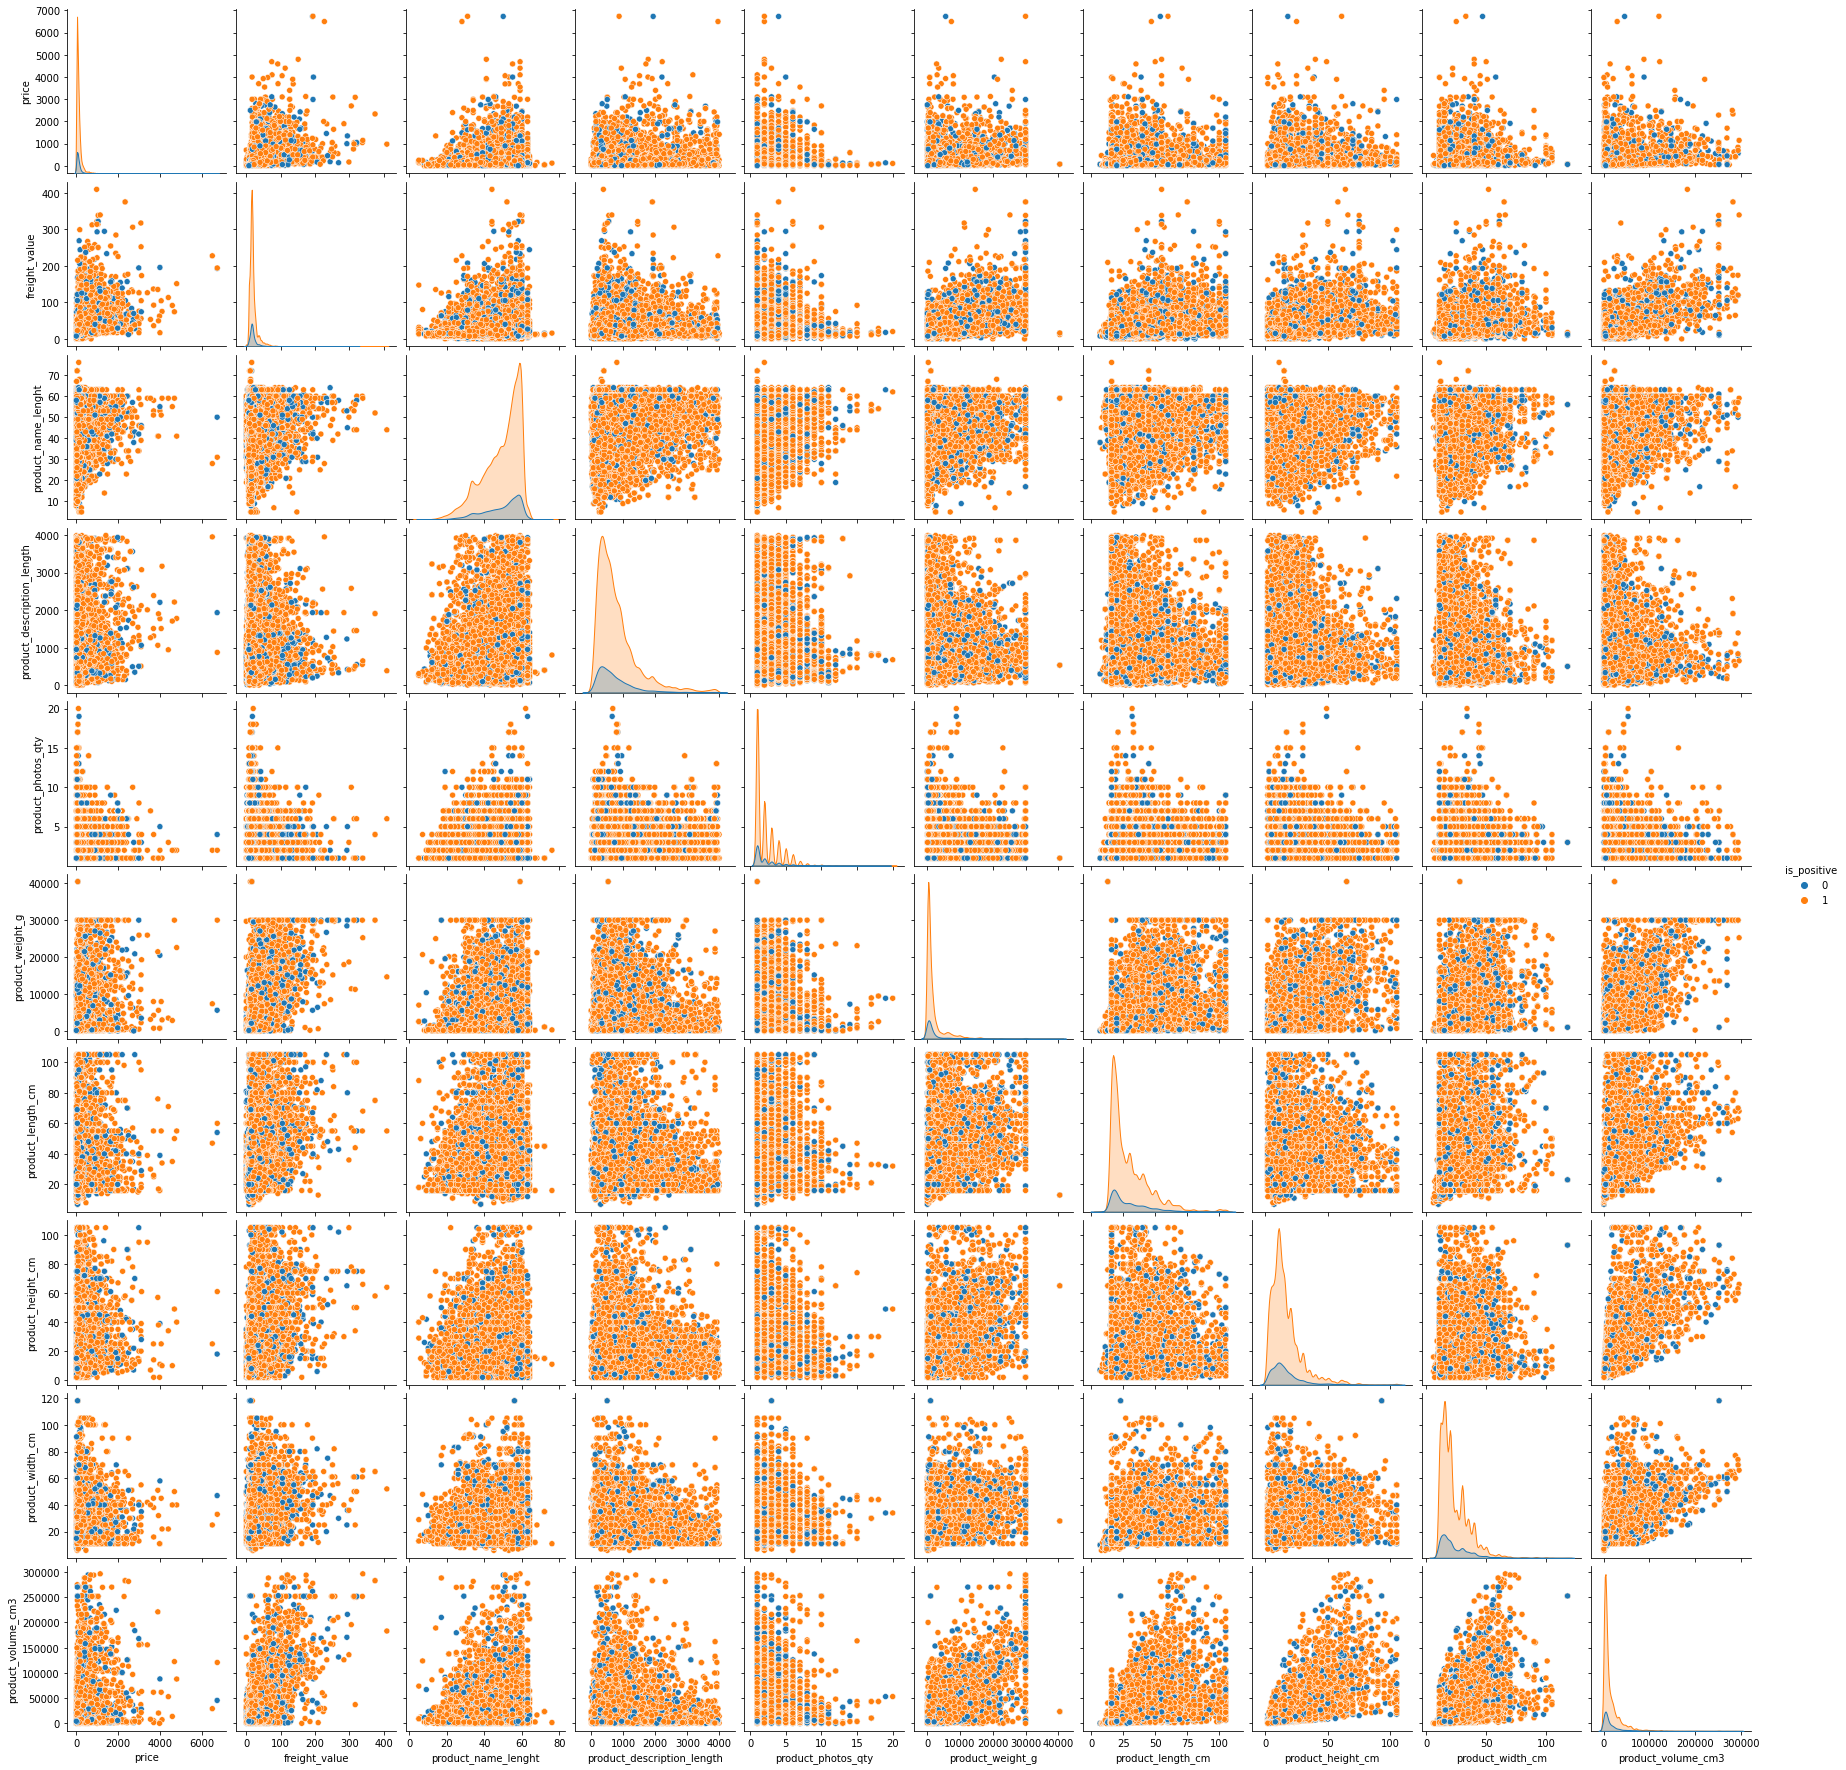

In [30]:
sns.pairplot(df_mvp, hue = "is_positive")

In [31]:
# final cleaning of dataset
print(df_mvp.shape)
df_mvp.dropna(inplace = True)
print(df_mvp.shape)

(88959, 11)
(87676, 11)


<ipython-input-31-f03949420a28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mvp.dropna(inplace = True)


In [32]:
# baseline model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [33]:
X = df_mvp.iloc[:, 1:]
y = df_mvp.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(52605, 10)
(35071, 10)
(52605,)
(35071,)


In [34]:
preds = []
acc = []
prec = []
scores = []

for i in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    preds.append(y_pred) 
    acc.append(metrics.accuracy_score(y_test, y_pred))
    prec.append(metrics.precision_score(y_test, y_pred))
    scores.append(knn.score(X_test, y_test))

KeyboardInterrupt: 

In [ ]:
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline
sns.lineplot(data = [acc, prec])

In [ ]:
print(acc)
print(prec)
print(scores)

In [ ]:
sns.lineplot(data = scores)

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

In [ ]:
lm.score(X_test, y_test)

In [ ]:
dict(zip(list(X.columns), lm.coef_.tolist()[0]))

In [ ]:
lm.intercept_

In [ ]:
# POST MVP WORK

In [35]:
# sampling
from sklearn.utils import resample

In [38]:
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(87676, 10)
(87676,)
(70140, 10)
(70140,)
(17536, 10)
(17536,)


In [39]:
train_df = pd.concat([y_train, X_train], axis = 1)
train_df.head()

is_positive   price  freight_value  product_name_lenght  \
31896            1   65.00          52.58                 47.0   
50194            0   78.97          21.21                 59.0   
84899            1   49.90          19.32                 58.0   
77656            0  119.90           9.83                 60.0   
51010            1   50.00          15.10                 41.0   

       product_description_length  product_photos_qty  product_weight_g  \
31896                       117.0                 2.0             550.0   
50194                      1104.0                 1.0            8809.0   
84899                       143.0                 1.0             790.0   
77656                      2361.0                 3.0            2555.0   
51010                       859.0                 3.0             750.0   

       product_length_cm  product_height_cm  product_width_cm  \
31896               35.0               15.0              25.0   
50194               52.0               52.0              17.0   
84899               36.0                8.0              25.0   
77656               55.0               17.0              48.0   
51010               16.0               16.0              16.0   

       product_volume_cm3  
31896             13125.0  
50194             45968.0  
84899              7200.0  
77656             44880.0  
51010              4096.0

In [40]:
neg = train_df[train_df.is_positive == 0]
pos = train_df[train_df.is_positive == 1]
print(neg.shape)
print(pos.shape)

(10009, 11)
(60131, 11)


In [41]:
# upsampling
neg_upsampled = resample(neg, replace = True, n_samples = len(pos), random_state = 42)
print(neg_upsampled.shape)
neg_upsampled.head()

(60131, 11)


is_positive  price  freight_value  product_name_lenght  \
44286            0   99.0          14.42                 58.0   
953              0  163.0          26.42                 33.0   
61914            0  159.9          46.61                 57.0   
29871            0   23.9          14.52                 45.0   
74582            0  113.9          27.34                 59.0   

       product_description_length  product_photos_qty  product_weight_g  \
44286                       655.0                 5.0            1300.0   
953                         523.0                 3.0             584.0   
61914                       254.0                 7.0            5500.0   
29871                       561.0                 2.0             553.0   
74582                       737.0                 1.0             800.0   

       product_length_cm  product_height_cm  product_width_cm  \
44286               30.0               10.0              30.0   
953                 16.0               11.0              13.0   
61914               35.0               60.0              40.0   
29871               18.0                9.0              15.0   
74582               20.0               20.0              20.0   

       product_volume_cm3  
44286              9000.0  
953                2288.0  
61914             84000.0  
29871              2430.0  
74582              8000.0

In [42]:
upsampled = pd.concat([pos, neg_upsampled])
upsampled.is_positive.value_counts()

0    60131
1    60131
Name: is_positive, dtype: int64

In [44]:
upsampled.head()

is_positive  price  freight_value  product_name_lenght  \
31896            1   65.0          52.58                 47.0   
84899            1   49.9          19.32                 58.0   
51010            1   50.0          15.10                 41.0   
49406            1   64.9          11.15                 50.0   
70085            1   89.0          12.12                 59.0   

       product_description_length  product_photos_qty  product_weight_g  \
31896                       117.0                 2.0             550.0   
84899                       143.0                 1.0             790.0   
51010                       859.0                 3.0             750.0   
49406                       844.0                 3.0             900.0   
70085                       316.0                 2.0            5900.0   

       product_length_cm  product_height_cm  product_width_cm  \
31896               35.0               15.0              25.0   
84899               36.0                8.0              25.0   
51010               16.0               16.0              16.0   
49406               86.0                4.0              20.0   
70085               38.0               35.0              28.0   

       product_volume_cm3  
31896             13125.0  
84899              7200.0  
51010              4096.0  
49406              6880.0  
70085             37240.0

In [45]:
X_train_up = upsampled.iloc[:, 1:]
y_train_up = upsampled.iloc[:, 0]

In [48]:
print(X_train_up.shape)
print(y_train_up.shape)

(120262, 10)
(120262,)


In [43]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [51]:
logreg = LogisticRegression()
logreg.fit(X_train_up, y_train_up)
logreg.score(X_train_up, y_train_up)

0.5293692105569506

In [54]:
y_pred = logreg.predict(X_test)
print(f"Accuracy:  {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall:    {metrics.recall_score(y_test, y_pred)}")
print(f"F1:        {metrics.f1_score(y_test, y_pred)}")

Accuracy:  0.533473996350365
Precision: 0.8672043010752688
Recall:    0.5372726667110785
F1:        0.6634856649253424


In [61]:
metrics.confusion_matrix(y_test, y_pred)

array([[1290, 1235],
       [6946, 8065]])

In [57]:
dict(zip(list(X_test.columns), logreg.coef_.tolist()[0]))

{'price': -4.055540094128742e-05,
 'freight_value': -0.005057681864433257,
 'product_name_lenght': -3.203140037602325e-05,
 'product_description_length': 9.942100474136532e-05,
 'product_photos_qty': 0.0007177496101453214,
 'product_weight_g': -6.941085288128841e-06,
 'product_length_cm': 0.0002729527734567863,
 'product_height_cm': 0.0001863147844903534,
 'product_width_cm': 0.0018215954148710239,
 'product_volume_cm3': -9.08952391564847e-07}

In [64]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_up, y_train_up)
print(knn.score(X_train_up, y_train_up))
print(knn.score(X_test, y_test))

0.8600638605710864
0.6364621350364964


In [63]:
#CV
from sklearn.model_selection import cross_val_score

In [67]:
knn_scores = cross_val_score(knn, X_test, y_test, scoring = "accuracy")
print(knn_scores)
print(knn_scores.mean())

[0.83124287 0.83946393 0.84031936 0.84260051 0.84031936]
0.8387892077061061


In [80]:
acc = []
prec = []
rec = []
f1 = []
for k in range(1, 26):
    knn2 = KNeighborsClassifier(n_neighbors = k)
    acc.append(cross_val_score(knn2, X_test, y_test, scoring = "accuracy").mean())
    prec.append(cross_val_score(knn2, X_test, y_test, scoring = "precision").mean())
    rec.append(cross_val_score(knn2, X_test, y_test, scoring = "recall").mean())
    f1.append(cross_val_score(knn2, X_test, y_test, scoring = "f1").mean())

In [81]:
print(acc)
print(prec)
print(rec)
print(f1)

[0.7632876777801296, 0.6907511902404672, 0.8175190586411475, 0.7897476426849835, 0.8387892077061061, 0.8254450376003165, 0.846259183863906, 0.8403285138470412, 0.8496805054169231, 0.8470002818926409, 0.8526458891957086, 0.8510492128627579, 0.8545277745535156, 0.8536153462743841, 0.8555541954045973, 0.8552690676636627, 0.8556112404609253, 0.8553831415195345, 0.8556683342876065, 0.8554402028326471, 0.8558964332289973, 0.855896416972213, 0.8559534457717566, 0.8558393881726692, 0.8560675033708443]
[0.8618422955175596, 0.8671813298853295, 0.860410619414051, 0.8629388830936087, 0.8593253321175917, 0.860115022332986, 0.8580573376772296, 0.858539354056717, 0.8572672432105936, 0.857831276975632, 0.8571591925639421, 0.8575879768039589, 0.8569384885648944, 0.8572991583663109, 0.8570038198137896, 0.8570856182583146, 0.8565634397755459, 0.856652899693243, 0.8562865504475321, 0.8562943736629436, 0.8561159876196307, 0.8561566062172268, 0.8561648089884291, 0.8561483987640777, 0.856099926298491]
[0.861

<AxesSubplot:>

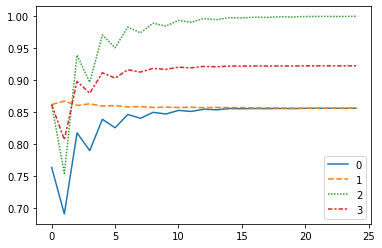

In [84]:
sns.lineplot(data = [acc, prec, rec, f1])

In [87]:
print(max(acc))
print(max(prec))
print(max(rec))
print(max(f1))

0.8560675033708443
0.8671813298853295
0.9999333777481679
0.9224434544706398
